# SVM Kernal- Polynomial And RBF Implementation Using Sklearn- Machine Learning


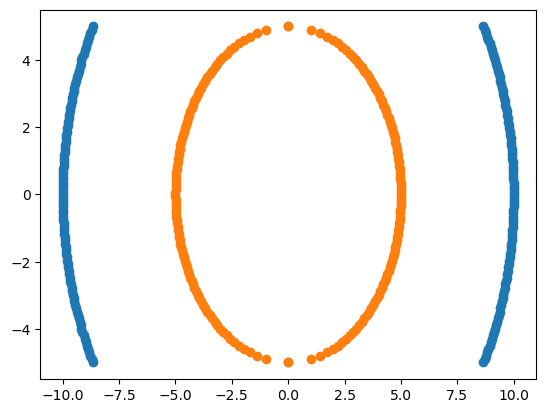

In [54]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5.0,5.0,100) #Creates 100 evenly spaced numbers between 5 and -5
y=np.sqrt(10**2-x**2) #equation of circle: x^2 + y^2 = 100...radius=10
y=np.hstack([y,-y]) #This line of code horizontally stacks the positive y values and their corresponding negative values.
x=np.hstack([x,-x]) #This line of code horizontally stacks the positive x values and their corresponding negative values.

x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)# Creating circle with radius 5
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])
plt.scatter(y,x)
plt.scatter(y1,x1)

In [55]:
import pandas as pd

df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [61]:
#### Separating Independent and dependent data:

X=df.iloc[:,:2] # all rows , and 1st 2 columns
y=df.Y # only col with head Y


In [62]:
### Split the Dataset into Train and Test:

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X,y,test_size=0.25,random_state=0)

In [63]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [64]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.45

## Polynomial Kernel


In [65]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [66]:

### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

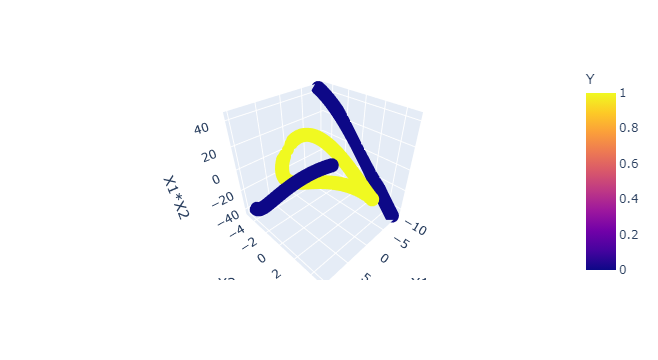

In [68]:

import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

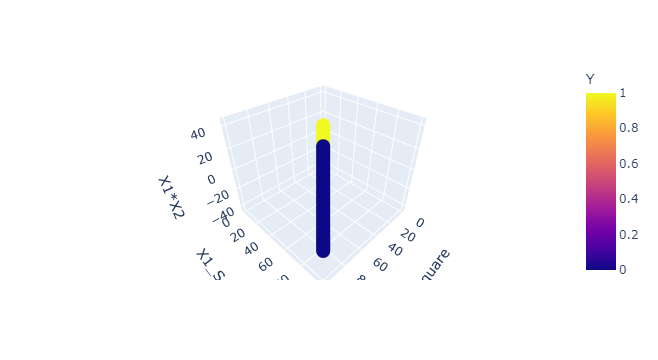

In [69]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [70]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0